In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.models import Model, Sequential
from keras import models
from keras import layers
from keras import backend as K
from keras.optimizers import Adam, RMSprop
from util.plots import plot_history
from nets.cnn_net.cnn_net import cnn_net
from glob import glob
import util.image_import as ii
import os
from keras.utils.np_utils import to_categorical
%matplotlib inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


In [2]:
# Importing the images
images_train = []
images_test = []

images_train.append(glob(os.path.join("../dataset3/res_still/train/arm", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/background", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/bun", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/carrots", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/catfood_beef", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/catfood_salmon", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/ketchup", "*.jpg")))
images_train.append(glob(os.path.join("../dataset3/res_still/train/potato", "*.jpg")))

images_test.append(glob(os.path.join("../dataset3/res_still/test/arm", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/test/background", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/test/bun", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/train/carrots", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/test/catfood_beef", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/test/catfood_salmon", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/test/ketchup", "*.jpg")))
images_test.append(glob(os.path.join("../dataset3/res_still/test/potato", "*.jpg")))


X_train, y_train = ii.images_to_numpy_full_class(images_train)
X_test, y_test = ii.images_to_numpy_full_class(images_test)

print("Number of training images: " + str(X_train.shape[0]) + " Number of test images: " + str(X_test.shape[0]))

# Setup of image data generator
batch_size = 32
num_classes = 8

# Making datagen for training with normilization, center, and dataugmentation
train_datagen = ImageDataGenerator(
        featurewise_center=True,
        #featurewise_std_normalization=True
        rescale=1./255,
        rotation_range=10,
        vertical_flip=True,
        horizontal_flip=True,
        brightness_range=(0.65, 1.35)
)

# Making datagen for validation and test with normilization
test_datagen = ImageDataGenerator(
        featurewise_center=True, 
        #featurewise_std_normalization=True
        rescale=1./255
)


X_train = X_train.astype(float)
X_test = X_test.astype(float)

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Required for featurewise normalization
train_datagen.fit(X_train)
valid_datagen.fit(X_train)

train_generator = train_datagen.flow(X_train,
                                     y_train,
                                     batch_size=batch_size, shuffle=True)

test_generator = test_generator.flow(X_val,
                                     y_val,
                                     batch_size=batch_size, shuffle=True)


AttributeError: module 'numpy' has no attribute 'float8'

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  #  3D activation map -> 1D vector
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5)) 
model.add(Dense(8))                                 # Conv2D prøve (5,5) i stedet for (3,3)
model.add(Activation('softmax'))                    # MaxPooling2D prøv (4,4) i stedet for (2,2)
                                                    # lr = [1e-2, 1e-3, 1e-4]
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=1e-3, epsilon=10e-8),
              metrics=['accuracy'])

In [5]:
history = model.fit_generator(
            train_generator,
            steps_per_epoch=1875 // batch_size,
            epochs=100,
            validation_data=test_generator,
            validation_steps=580 // batch_size)

Epoch 1/100
17/17 [==============================] - 5s 301ms/step - loss: 1.2065 - acc: 0.4082 - val_loss: 0.9001 - val_acc: 0.3500
Epoch 2/100
17/17 [==============================] - 4s 260ms/step - loss: 0.7652 - acc: 0.6455 - val_loss: 0.7043 - val_acc: 0.6625
Epoch 3/100
17/17 [==============================] - 4s 255ms/step - loss: 0.5767 - acc: 0.7704 - val_loss: 0.3751 - val_acc: 0.9625
Epoch 4/100
17/17 [==============================] - 5s 266ms/step - loss: 0.4543 - acc: 0.8037 - val_loss: 0.3970 - val_acc: 0.9437
Epoch 5/100
17/17 [==============================] - 4s 263ms/step - loss: 0.4012 - acc: 0.8456 - val_loss: 0.2477 - val_acc: 0.9812
Epoch 6/100
17/17 [==============================] - 4s 258ms/step - loss: 0.3366 - acc: 0.8786 - val_loss: 0.2104 - val_acc: 0.9875
Epoch 7/100
17/17 [==============================] - 4s 259ms/step - loss: 0.2785 - acc: 0.8946 - val_loss: 0.1897 - val_acc: 0.9812
Epoch 8/100
17/17 [==============================] - 5s 265ms/step - 

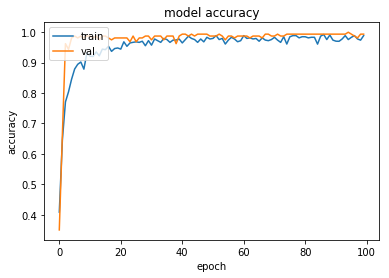

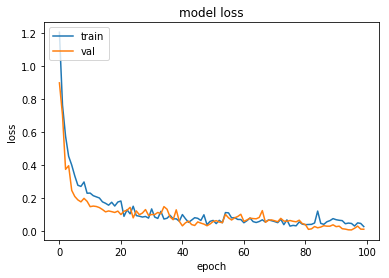

In [7]:
plot_history(history, save=True, path='nets/cnn_net/', name='cnn_full')

In [8]:
imgs, labels = next(test_generator)

model.evaluate(imgs,labels, batch_size=80)

80/80 [==============================] - 0s 6ms/step


[0.059192586690187454, 0.987500011920929]